# 🌐🌏 Spatial Analysis of Airbnb and Housing Market  Dynamics in the UK 🏠💹

## Introduction
The focus here is a GIS task - to demonstrate the spatial relationship between the Airbnb data with other factors such as housing prices, and the short to let market. Using the datasets that I have shared here and using your own research, can you answer a series of research questions using spatial data science principles. 

For the study on the spatial relationship between Airbnb data, housing prices, and the short-let market in the UK, here's how you can structure the **Overview of the Study** and **Objectives** sections, incorporating the spatial data science methods mentioned.

This codebook outlines the variables, data sources, and spatial data science methods that will be used in the analysis of Airbnb listings and their impact on housing prices and the short-let market in the UK. I require this in python. 

### Overview of the Study
This study explores the intricate spatial dynamics between Airbnb listings, housing prices, and the short-let market in the UK. With the rapid growth of Airbnb, its influence on local housing markets has become a critical issue. This study employs advanced spatial data science techniques to analyze the distribution and impact of Airbnb listings across various regions in the UK. By integrating data on housing prices, short-let markets, and Airbnb activity, the research aims to uncover patterns and relationships that inform policy-making, urban planning, and real estate investment strategies.

### Objectives
1. **Map the Spatial Distribution of Airbnb Listings:**
2. **Identify Clusters and Spatial Patterns:**
3. **Analyze the Impact of Proximity to Amenities:**
4. **Examine the Relationship Between Airbnb Listings and Housing Prices:**
5. **Visualize Socioeconomic Factors and Airbnb Density:**
6. **Assess the Impact of Airbnb on Local Housing Markets:**
7. **Evaluate Connectivity and Accessibility:**


These objectives will guide the study in systematically uncovering the spatial relationships between Airbnb activity, housing prices, and the short-let market, providing insights into the broader impact of short-term rentals on local housing dynamics in the UK.

## Variables

### Airbnb Data
- **listing_id**: Unique identifier for Airbnb listing.
- **latitude**: Latitude coordinate of listing/property/area.
- **longitude**: Longitude coordinate of listing/property/area.
- **price_per_night**: Price per night for Airbnb listing.
- **availability_365**: Number of days listing is available in a year.
- **number_of_reviews**: Total number of reviews for Airbnb listing.
- **neighbourhood**: Name of the neighborhood of Airbnb listing.

### Property Data
- **postcode**: Postal code of property/area (Source: Housing Prices, Short-let, ONS Data).
- **price**: Sale price of property (Source: UK House Price Index - UKHPI).
- **date_of_sale**: Date when the property was sold (Source: UK House Price Index - UKHPI).
- **property_type**: Type of property (detached, semi-detached, etc.) (Source: UK House Price Index - UKHPI).
- **rental_price**: Monthly rental price of short-let property (Source: Short-let Market Data).
- **availability_status**: Current availability status of short-let property (Source: Short-let Market Data).

### Socioeconomic Data
- **median_income**: Median household income for area (Source: ONS Data).
- **population_density**: Population density of area (Source: ONS Data).
- **unemployment_rate**: Unemployment rate for area (Source: ONS Data).

### Geographical Data
- **boundary_polygon**: Polygon representing geographical boundaries (Source: Ordnance Survey Data).

## Data Sources

- **Airbnb Data**: Data related to Airbnb listings, including pricing and reviews.
- **UK House Price Index (UKHPI)**: Provides information on property sales prices and property types.
- **Short-let Market Data**: Contains data on short-let rental prices and availability.
- **ONS Data**: Includes socioeconomic indicators such as median income, population density, and unemployment rate.
- **Ordnance Survey Data**: Provides geographical boundaries for the areas in question.


## Install all the required libraries

In [1]:
# data analysis
import pandas as pd
# import scipy
# import statmodel


# spatail anlaysis
import geopandas as gpd
# import osmnx
# import geopy
# import pysal

# data visualization
import seaborn as sns
import matplotlib.pyplot as plt
# import convetex
# import folium


# set warning
import warnings

warnings.filterwarnings('ignore')

In [2]:
# set dataframe max display width
pd.set_option('display.max_columns',100)
pd.set_option('display.expand_frame_repr', False)

## Data Import and Pre-processing: 

Importing datasets (Airbnb, housing prices, short-let market data, etc.). Cleaning and pre-processing data, including geocoding.

In [3]:
# read all data 
airbnb_path = "data/Airbnb listings.csv"
boudnary_path = "data/house_pricing"
scrapped_market = "data/shortlet_market_data.csv"
demo_data =""


In [4]:
airbnb_listing = pd.read_csv(airbnb_path)
airbnb_listing.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,host_url,host_name,host_since,host_location,host_about,host_response_time,host_response_rate,host_acceptance_rate,host_is_superhost,host_thumbnail_url,host_picture_url,host_neighbourhood,host_listings_count,host_total_listings_count,host_verifications,host_has_profile_pic,host_identity_verified,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bathrooms_text,bedrooms,beds,amenities,price,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,minimum_nights_avg_ntm,maximum_nights_avg_ntm,calendar_updated,has_availability,availability_30,availability_60,availability_90,availability_365,calendar_last_scraped,number_of_reviews,number_of_reviews_ltm,number_of_reviews_l30d,first_review,last_review,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,312761,https://www.airbnb.com/rooms/312761,20240319050633,2024-03-21,city scrape,Spacious Central London Apartment by Hoxton Sq...,"Very central location, in the middle of Shored...",Everything is so convenient and the area is al...,https://a0.muscache.com/pictures/miso/Hosting-...,1608226,https://www.airbnb.com/users/show/1608226,Pippa,2012-01-15,"London, United Kingdom",I love exploring new places when possible and ...,within a few hours,100%,98%,t,https://a0.muscache.com/im/pictures/user/User-...,https://a0.muscache.com/im/pictures/user/User-...,Shoreditch,1.0,3.0,"['email', 'phone']",t,t,"London, England, United Kingdom",Hackney,NaN,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Coffee m...",$160.00,9,180,2.0,9.0,180.0,180.0,7.6,180.0,NaN,t,7,17,30,81,2024-03-21,122,26,0,2012-07-12,2024-02-03,4.96,4.97,4.93,4.96,5.00,4.89,4.93,NaN,f,1,1,0,0,0.86
1,13913,https://www.airbnb.com/rooms/13913,20240319050633,2024-03-20,city scrape,Holiday London DB Room Let-on going,My bright double bedroom with a large window h...,Finsbury Park is a friendly melting pot commun...,https://a0.muscache.com/pictures/miso/Hosting-...,54730,https://www.airbnb.com/users/show/54730,Alina,2009-11-16,"London, United Kingdom",I am a Multi-Media Visual Artist and Creative ...,within a few hours,86%,84%,t,https://a0.muscache.com/im/users/54730/profile...,https://a0.muscache.com/im/users/54730/profile...,LB of Islington,3.0,5.0,"['email', 'phone']",t,t,"Islington, Greater London, United Kingdom",Islington,NaN,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1 shared bath,1.0,1.0,"[""Toaster"", ""Room-darkening shades"", ""Shampoo""...",$65.00,1,29,1.0,1.0,29.0,29.0,1.0,29.0,NaN,t,29,52,82,351,2024-03-20,41,1,0,2010-08-18,2023-11-26,4.80,4.73,4.73,4.75,4.83,4.70,4.70,NaN,f,3,2,1,0,0.25
2,15400,https://www.airbnb.com/rooms/15400,20240319050633,2024-03-20,city scrape,Bright Chelsea Apartment. Chelsea!,Lots of windows and light. St Luke's Gardens ...,It is Chelsea.,https://a0.muscache.com/pictures/428392/462d26...,60302,https://www.airbnb.com/users/show/60302,Philippa,2009-12-05,"Royal Borough of Kensington and Chelsea, Unite...","English, grandmother, I have travelled quite ...",within a day,100%,40%,f,https://a0.muscache.com/im/users/60302/profile...,https://a0.muscache.com/im/users/60302/profile...,Chelsea,1.0,1.0,"['email', 'phone']",t,t,"London, United Kingdom",Kensington and Chelsea,NaN,51.48780,-0.16813,Entire rental unit,Entire home/apt,2,1.0,1 bath,1.0,1.0,"[""Shampoo"", ""Wifi"", ""Fire extinguisher"", ""Lugg...",$120.00,4,30,4.0,4.0,30.0,30.0,4.0,30.0,NaN,t,12,12,1

In [5]:
airbnb_listing.columns

Index(['id', 'listing_url', 'scrape_id', 'last_scraped', 'source', 'name',
       'description', 'neighborhood_overview', 'picture_url', 'host_id',
       'host_url', 'host_name', 'host_since', 'host_location', 'host_about',
       'host_response_time', 'host_response_rate', 'host_acceptance_rate',
       'host_is_superhost', 'host_thumbnail_url', 'host_picture_url',
       'host_neighbourhood', 'host_listings_count',
       'host_total_listings_count', 'host_verifications',
       'host_has_profile_pic', 'host_identity_verified', 'neighbourhood',
       'neighbourhood_cleansed', 'neighbourhood_group_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bathrooms_text', 'bedrooms', 'beds', 'amenities', 'price',
       'minimum_nights', 'maximum_nights', 'minimum_minimum_nights',
       'maximum_minimum_nights', 'minimum_maximum_nights',
       'maximum_maximum_nights', 'minimum_nights_avg_ntm',
       'maximum_nights_avg_ntm', 'ca

In [6]:
airbnb_listing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 75 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   id                                            90852 non-null  int64  
 1   listing_url                                   90852 non-null  object 
 2   scrape_id                                     90852 non-null  int64  
 3   last_scraped                                  90852 non-null  object 
 4   source                                        90852 non-null  object 
 5   name                                          90852 non-null  object 
 6   description                                   87851 non-null  object 
 7   neighborhood_overview                         47521 non-null  object 
 8   picture_url                                   90842 non-null  object 
 9   host_id                                       90852 non-null 

In [7]:
selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude',
       'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
       'bedrooms', 'beds', 'amenities', 'price','review_scores_rating',
       'review_scores_location']

airbnb_listing_df = airbnb_listing[selected_columns]
airbnb_listing_df.head().T

,0,1,2,3,4
neighbourhood,"London, England, United Kingdom","Islington, Greater London, United Kingdom","London, United Kingdom","Lambeth, England, United Kingdom","Kensington, England, United Kingdom"
neighbourhood_cleansed,Hackney,Islington,Kensington and Chelsea,Lambeth,Kensington and Chelsea
latitude,51.52704,51.56861,51.4878,51.46788,51.51735
longitude,-0.08129,-0.1127,-0.16813,-0.09993,-0.21076
property_type,Entire rental unit,Private room in rental unit,Entire rental unit,Private room in rental unit,Entire rental unit
room_type,Entire home/apt,Private room,Entire home/apt,Private room,Entire home/apt
accommodates,2,1,2,2,2
bathrooms,1.0,1.0,1.0,1.0,1.0
bedrooms,1.0,1.0,1.0,1.0,1.0
beds,1.0,1.0,1.0,1.0,1.0


In [8]:
airbnb_listing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 90852 entries, 0 to 90851
Data columns (total 14 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   neighbourhood           47522 non-null  object 
 1   neighbourhood_cleansed  90852 non-null  object 
 2   latitude                90852 non-null  float64
 3   longitude               90852 non-null  float64
 4   property_type           90852 non-null  object 
 5   room_type               90852 non-null  object 
 6   accommodates            90852 non-null  int64  
 7   bathrooms               57894 non-null  float64
 8   bedrooms                78118 non-null  float64
 9   beds                    57837 non-null  float64
 10  amenities               90852 non-null  object 
 11  price                   57885 non-null  object 
 12  review_scores_rating    65869 non-null  float64
 13  review_scores_location  65808 non-null  float64
dtypes: float64(7), int64(1), object(6)
mem

Data Cleaning
* The price column was converted from a string to a numeric type by removing any dollar signs and ensuring it was represented as a float.
* Missing values across all columns were filled with zeroes to avoid any NaN issues.
* Columns like bathrooms, bedrooms, and beds, originally stored as floats, were converted to integers for consistency, as fractional values were not meaningful in these contexts.
* The amenities column, which contained lists of amenities as strings, was converted into binary columns for each unique amenity, where 1 indicated the presence of that amenity and 0 indicated its absence.

In [9]:
import ast

# Convert `price` to numeric after removing the dollar sign
airbnb_listing_df['price'] = airbnb_listing_df['price'].replace('[\$,]', '', regex=True).astype(float)

# Convert appropriate columns to numeric
airbnb_listing_df['bathrooms'] = pd.to_numeric(airbnb_listing_df['bathrooms'], errors='coerce')
airbnb_listing_df['bedrooms'] = pd.to_numeric(airbnb_listing_df['bedrooms'], errors='coerce')
airbnb_listing_df['beds'] = pd.to_numeric(airbnb_listing_df['beds'], errors='coerce')
airbnb_listing_df['review_scores_rating'] = pd.to_numeric(airbnb_listing_df['review_scores_rating'], errors='coerce')
airbnb_listing_df['review_scores_location'] = pd.to_numeric(airbnb_listing_df['review_scores_location'], errors='coerce')

# Fill all NaN values with zeroes
airbnb_listing_df.fillna(0, inplace=True)

# Convert `amenities` from string to a list
airbnb_listing_df['amenities'] = airbnb_listing_df['amenities'].apply(lambda x: ast.literal_eval(x))

# Collect all unique amenities
all_amenities = set()
for amenities_list in airbnb_listing_df['amenities']:
    all_amenities.update(amenities_list)

# Create binary columns for each unique amenity
for amenity in all_amenities:
    airbnb_listing_df[amenity] = airbnb_listing_df['amenities'].apply(lambda x: 1 if amenity in x else 0)

# Drop the original 'amenities' column as it's no longer needed
airbnb_listing_df.drop('amenities', axis=1, inplace=True)

In [10]:
airbnb_listing_df.head()

,neighbourhood,neighbourhood_cleansed,latitude,longitude,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,review_scores_rating,review_scores_location,"52"" HDTV with Amazon Prime Video, Apple TV, Netflix, Disney+",Theme room,"48"" HDTV with Amazon Prime Video, Netflix, premium cable","24"" TV with Amazon Prime Video, Apple TV, Fire TV, Netflix",Fast wifi – 274 Mbps,"53"" HDTV",Carbon monoxide alarm,"49"" HDTV with Fire TV, Netflix, premium cable",John Lewis oven,Teka stainless steel gas stove,Any refrigerator,Soaps and shower gels body soap,O Boticário body soap,"60"" HDTV with Amazon Prime Video, Netflix",Free carport on premises – 20 spaces,Dont Know induction stove,Fast wifi – 261 Mbps,"HDTV with standard cable, Netflix, Apple TV, Amazon Prime Video","TV with Amazon Prime Video, Apple TV, Chromecast, Disney+, Netflix, standard cable",Ramona oven,"50"" TV with Disney+, Netflix",Elsyl Natural Look Conditioner conditioner,Handmade Himalayan products shampoo,Faith In Nature - Coconut Shampoo (vegan) shampoo,Ors shampoo,"55"" HDTV with Amazon Prime Video, Netflix, Apple TV, Disney+",IKEA induction stove,"30"" HDTV with Amazon Prime Video, Apple TV, Disney+, Netflix, premium cable",Cruelty Free body soap,Non brand shampoo,"32"" TV with standard cable",Fast wifi – 203 Mbps,Security system,Original Source Plant-based conditioner,Korean shampoo shampoo,Alexia Bluetooth sound system,Palmers body soap,...,Ultimate Ears Bluetooth sound system,"49"" HDTV with Amazon Prime Video, Netflix, standard cable",Reviive conditioner,"Varies, available in the bathroom. conditioner",Game console: Nintendo Wii and PS4,Tressemé conditioner,Fast wifi – 771 Mbps,Harman & Kardon Bluetooth sound system,Fast wifi – 591 Mbps,"40"" HDTV with Amazon Prime Video, Chromecast, Disney+, Fire TV, Netflix",Aesop shampoo,"40"" TV with Fire TV, premium cable",Apple speaker Bluetooth sound system,"Fill (Eco-friendly, vegan, refillable) conditioner",Lewis & Cole shampoo,"50"" HDTV with Chromecast, Netflix","36"" TV with Fire TV",Ava Estell body soap,Combi Oven oven,"50"" HDTV with Amazon Prime Video, Disney+, Netflix, Roku",Hallis & balley shampoo,"29"" HDTV with standard cable",Fast wifi – 208 Mbps,Conduction oven,"50"" HDTV with Amazon Prime Video, Netflix, standard cable, Disney+",Elemis shampoo,"HDTV with Hulu, Roku","Molton Brown, Scottish Fine Soap Company body soap",Wirlpool stainless steel oven,"70"" HDTV with Netflix, Amazon Prime Video",Argan shampoo,Samsung single oven,"TV with Amazon Prime Video, Chromecast, Disney+, Fire TV, Netflix, standard cable, Apple TV",Neil’s yard or L’Oréal shampoo,"HDTV with Disney+, Netflix, premium cable","Housekeeping available from 9:30 AM to 12:30 PM, Thursday - available at extra cost",Siemens stainless steel double oven,Mercury stainless steel double oven,"12"" HDTV with Netflix, Amazon Prime Video, premium cable, Chromecast",From local shop shampoo,Cole & lewis conditioner,"HDTV with premium cable, Amazon Prime Video, Netflix, Fire TV, standard cable, Disney+",Standalone high chair - always at the listing,Montpellier stainless steel gas stove,"65"" HDTV with Apple TV, Fire TV, Netflix, premium cable, Roku, standard cable",Mulben&Fearne shampoo,Various A brands body soap,HAIR shampoo,"49"" HDTV with Amazon Prime Video, Netflix, Disney+",Marshall sound system with Bluetooth and aux
0,"London, England, United Kingdom",Hackney,51.52704,-0.08129,Entire rental unit,Entire home/apt,2,1.0,1.0,1.0,160.0,4.96,4.89,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,"Islington, Greater London, United Kingdom",Islington,51.56861,-0.11270,Private room in rental unit,Private room,1,1.0,1.0,1.0,65.0,4.80,4.70,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,"London

Housing Prices Data

THe housye prices data was donloaded from KAgglem the dataset contains data from UK House Price Index (UKHPI) from HM Land Registry, Office for National Statistics (ONS). via kaggle platform

Link to the datasets:

Shortlet MArket data downloaded

THe shortlet market data was doenaloded from rightmove, on the market and zoopla services the last 7 days sales and rent data set was scrappedm we could only scrapped for  longs 7days beacause this paltform has a limit to aht we could get from the platofrm, a selenum python scrapper was beault to scrapped and clean this data.

Sources:
rightmove.co.uk
onthemarket
zoopla.co.uk

In [11]:
# get all the data scarapped from all the sources
# omt_data = 
# rightmove_data =
# zoopla_data = 

Demo graphic Datasets

## Exploratory Data Analysis (EDA)


Descriptive statistics and initial visualizations of key variables.

Explore the data
Answers the following Questions from the the Airbnb Data

* Spatial Distribution
* Property Type Insights
* Room Type Comparisons
* Capacity and Pricing Analysis:*
* Amenities and Pricing
* Bathroom and Bedroom Analysis
* Review Scores Examination
* Trend Analysis
* Outlier Detection


### Airbnb Data

**Spatial Distribution:**
- How does the spatial distribution of listings with high review scores compare to those with lower scores?
- Are there specific areas where higher-priced properties tend to cluster?
- How does the average price of listings vary by neighborhood or neighborhood group?
- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

In [11]:
# selected_columns = ['neighbourhood', 'neighbourhood_cleansed', 'latitude',
#        'longitude', 'property_type', 'room_type', 'accommodates', 'bathrooms',
#        'bedrooms', 'beds', 'amenities', 'price','review_scores_rating',
#        'review_scores_location']

airbnb_listing_df['neighbourhood'].value_counts()

neighbourhood
0                                                       43330
Greater London, England, United Kingdom                 34414
London, United Kingdom                                   5086
London, England, United Kingdom                          4567
London, Greater London, United Kingdom                    624
                                                        ...  
Oval, London, United Kingdom                                1
Beckenham, Greater London, United Kingdom                   1
 St Margaret's, Isleworth, Middlesex, United Kingdom        1
London, Kennington, United Kingdom                          1
Earlsfield, England, United Kingdom                         1
Name: count, Length: 866, dtype: int64

CHeck the destribution of the property types in the area

<Axes: xlabel='property_type'>

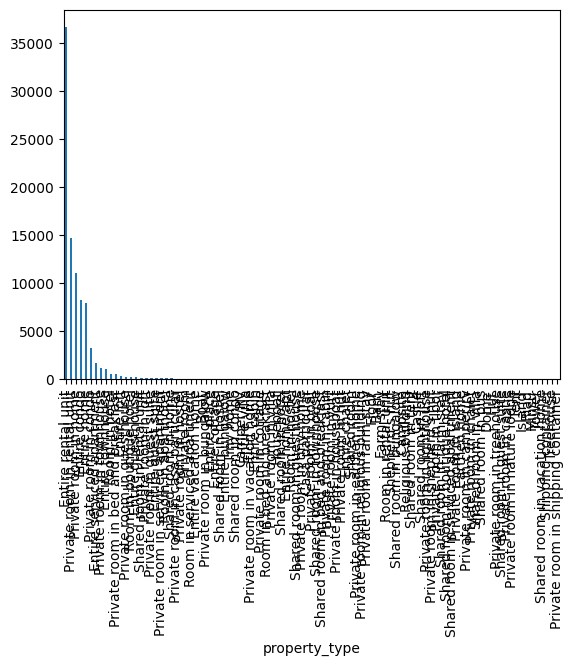

In [16]:
airbnb_list['property_type'].value_counts().plot(kind="bar")

Capacity and Pricing Analysis
   - How does the price of listings correlate with the number of accommodations (e.g., accommodates 2 vs. 6)?
   - What is the relationship between the number of bedrooms or beds and the price of listings?

              price  bedrooms      beds  bathrooms
price      1.000000  0.191399  0.288861   0.306312
bedrooms   0.191399  1.000000  0.505918   0.414537
beds       0.288861  0.505918  1.000000   0.703664
bathrooms  0.306312  0.414537  0.703664   1.000000


<Axes: >

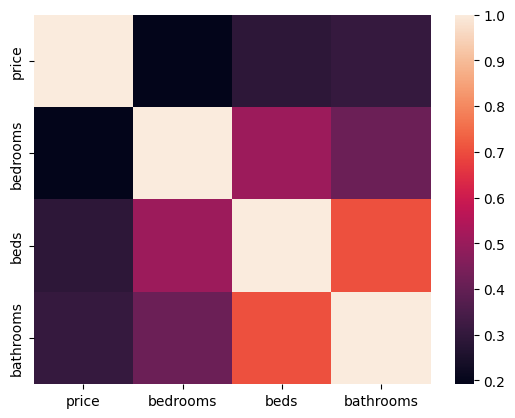

In [16]:
corr_price = airbnb_listing_df[['price','bedrooms',"beds",'bathrooms']]
price_corr = corr_price.corr()
print(price_corr)

sns.heatmap(price_corr)

Amenities and Pricing
   - Which amenities are most commonly found in higher-priced listings?
   - How does the number of amenities offered impact the review scores or pricing?

Bathroom and Bedroom Analysis
   - Is there a correlation between the number of bathrooms and the price of the listing?
   - How does the average number of bedrooms relate to the listing price?

Review Scores Examination
   - How do review scores (accuracy and overall rating) vary by property type or room type?
   - Is there a relationship between review scores and the number of amenities offered?


Trend Analysis
   - Are there any observable trends in pricing or review scores over time within different neighborhoods or property types?
   - How do the review scores change with seasonal variations in pricing?


Outlier Detection
   - Are there any outliers in pricing or review scores based on the number of bedrooms, bathrooms, or amenities?
   - What factors contribute to high or low review scores in specific neighborhoods?

Spatial Distribution:

- How does the spatial distribution of listings with high review scores compare to those with lower scores?
- Are there specific areas where higher-priced properties tend to cluster?
- How does the average price of listings vary by neighborhood or neighborhood group?
- Are there significant differences in average review scores between different neighborhoods or neighborhood groups?

<Axes: >

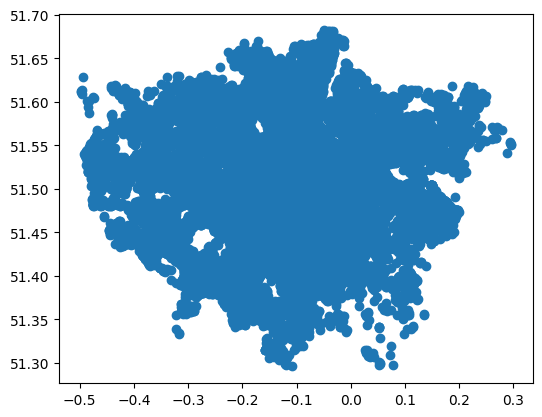

In [16]:
# Convert to GeoDataFrame
gdf_airbnb = gpd.GeoDataFrame(
    airbnb_list,
    geometry=gpd.points_from_xy(airbnb_list['longitude'], airbnb_list['latitude']),
    crs="EPSG:4326"  # WGS84 coordinate system
)

# Display the data via a plot
gdf_airbnb.plot()

Housing Prices Data

**Property Type Insights:**
   - What is the distribution of property types (e.g., entire home, private room) across different neighborhoods?
   - How does the average price differ between various property types?

Shortlet Market Data

**Room Type Comparisons:**
   - How does the average rating of listings vary between different room types (e.g., shared room, private room)?
   - Is there a correlation between room type and the number of amenities offered?

## Spatial Analysis
Geocoding and plotting data on maps. Performing hotspot analysis, spatial autocorrelation, and kernel density estimation.


1. **Map the Spatial Distribution of Airbnb Listings:**
   - Geocode Airbnb listings to visualize their distribution across different regions in the UK.
   - Use Kernel Density Estimation (KDE) to identify areas of high Airbnb concentration.

In [ ]:
# plot the kernel density map
# set up the figure and axes
fig, axs = plt.subplots(1,2,figsize=(16,6))

# uisng KDE plot to plot the density maps
sns.kdeplot(
    data=airbnb_list,
    x='longitude',
    y='latitude',
    n_levels=75,
    shade=True,
    fill=True,
    levels=90,
    alpha=0.55,
    linewidths=1.5,
    cmap=plt.get_cmap('jet'),
    ax=axs[0]
)

# Generate and add the scatter plot to the second axis
sns.scatterplot(
    data=airbnb_list,
    x="longitude",
    y="latitude",
    alpha=0.5,
    color='blue',
    ax=axs[1]
)

# Set titles for the plots
axs[0].set_title("KDE Plot")
axs[1].set_title("location plot")




2. **Identify Clusters and Spatial Patterns:**
   - Apply Hotspot Analysis (Getis-Ord Gi*) to detect statistically significant clusters of Airbnb activity.
   - Measure spatial autocorrelation (Moran's I) to determine the degree of spatial dependency among Airbnb listings.

In [ ]:
# Create a spatial weights matrix based on the data's spatial coordinates
w = lib.weights.distance.KNN.from_dataframe(airbnb_list, k=10)

# Calculate Moran's I for the spatial coordinates
moran = esda.Moran(airbnb_list['Latitude'],w)

# Print the Moran's I statistic and p-value
print(f"Moran's I: {moran.I:.2f}")
print(f"p-value: {moran.p_sim:.3f}")

plot_moran(moran, zstandard=True, figsize=(10,4))
plt.show()

3. **Analyze the Impact of Proximity to Amenities:**
   - Conduct Proximity Analysis to assess how the distance to key amenities (e.g., transport hubs, tourist attractions) affects Airbnb pricing and availability.

## Regression and Impact Analysis
Running spatial regression models to assess the impact of Airbnb listings on housing prices.


4. **Examine the Relationship Between Airbnb Listings and Housing Prices:**
   - Perform a Spatial Lag Model regression to account for spatial dependencies in housing prices influenced by nearby Airbnb activity.
   - Utilize Geographically Weighted Regression (GWR) to explore how the relationship between Airbnb listings and housing prices varies spatially across the UK.

## Visualization
Creating choropleth maps and other visualizations to illustrate findings.


5. **Visualize Socioeconomic Factors and Airbnb Density:**
   - Create Choropleth Maps to visualize the distribution of variables such as median income, housing prices, and Airbnb density across different regions.

## Conducting impact analysis on the short-let market.

6. **Assess the Impact of Airbnb on Local Housing Markets:**
   - Conduct an Impact Analysis to examine how Airbnb density correlates with changes in housing prices and the availability of long-term rentals.
   - Use Buffer Analysis to study the effect of proximity to city centres and other key areas on Airbnb pricing and availability.


   7. **Evaluate Connectivity and Accessibility:**
   - Perform Network Analysis to assess the connectivity of Airbnb listings to transport networks and its influence on pricing and availability.

## Conclusions and Recommendations
Summarizing key findings and providing policy recommendations.


## Appendix
Including any additional analyses or data pre-processing steps.